## Data Understanding and library import

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('data.csv')

In [5]:
pd.pandas.set_option('max_columns',None)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
data.shape

(569, 33)

In [9]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
data.dropna(inplace=True,axis=1)

In [11]:
data.isnull().all()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [12]:
len(data.columns)

32

In [13]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
data.drop(columns=['id'],inplace=True)

In [15]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [16]:
data.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

## Data Preprocessing

In [17]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [18]:
label = LabelEncoder()
data['diagnosis'] = label.fit_transform(data['diagnosis'])

In [19]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [21]:
data.shape

(569, 31)

**If I had the nominal y target variable in the more than 2 that we will get dummies and use that whole dummie variable as y variable**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=0.80)

In [25]:
x_train.shape,y_train.shape

((455, 30), (455,))

In [26]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)

In [28]:
input_dim = x_train.shape[1]
input_dim

30

## Model Building

In [29]:
model = Sequential()
model.add(Dense(120,activation='relu',kernel_initializer='he_uniform',input_dim=input_dim))
model.add(Dense(80,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(60,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               3720      
_________________________________________________________________
dense_1 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 18,321
Trainable params: 18,321
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(x_train,y_train,batch_size=5,epochs=10,verbose=0,validation_split=0.20)

In [33]:
y_predict = model.predict_classes(x_test)
y_predict

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [34]:
evalution = pd.DataFrame(dict(Atual=y_test,Predicted=y_predict.flatten()))

In [35]:
evalution.head()

,Atual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


### Model Accuray

In [36]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report

In [37]:
print('Model accuracy :-',accuracy_score(y_test,y_predict))
print('Model MSE :-',mean_squared_error(y_test,y_predict))
print('Model MAE :-',mean_absolute_error(y_test,y_predict))

Model accuracy :- 0.9649122807017544
Model MSE :- 0.03508771929824561
Model MAE :- 0.03508771929824561


### Confusion metrics

In [38]:
mat = confusion_matrix(y_test,y_predict)
mat

array([[69,  3],
       [ 1, 41]], dtype=int64)

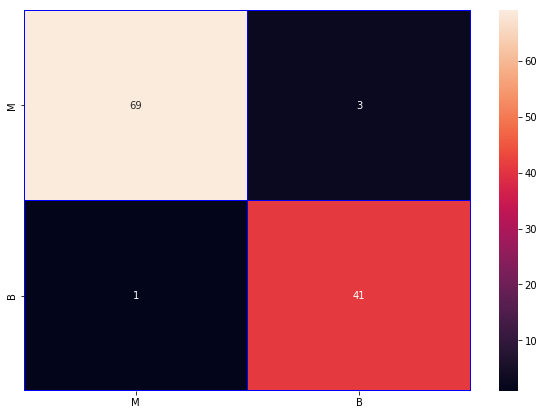

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(mat,annot=True,fmt='d',linecolor='b',linewidths=0.4,xticklabels=['M','B'],yticklabels=['M','B'])
plt.show()

## Cross Validation

In [40]:
def set_model():
    model = Sequential()
    model.add(Dense(120,activation='relu',kernel_initializer='he_uniform',input_dim=input_dim))
    model.add(Dense(60,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(80,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model 

model 

classifier = KerasClassifier(set_model,batch_size=10,epochs=8)
accuracy = cross_val_score(classifier,x_train,y_train,scoring='accuracy',cv=10,n_jobs=1,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 409 samples
Epoch 1/8
409/409 [==============================] - 1s 2ms/sample - loss: 0.2485 - accuracy: 0.8998
Epoch 2/8
409/409 [==============================] - 0s 240us/sample - loss: 0.0930 - accuracy: 0.9707
Epoch 3/8
409/409 [==============================] - 0s 257us/sample - loss: 0.0651 - accuracy: 0.9804
Epoch 4/8
409/409 [==============================] - 0s 254us/sample - loss: 0.0490 - accuracy: 0.9878
Epoch 5/8
409/409 [==============================] - 0s 249us/sample - loss: 0.0367 - accuracy: 0.9927
Epoch 6/8
409/409 [==============================] - 0s 301us/sample - loss: 0.0307 - accuracy: 0.9927
Epoch 7/8
409/409 [==============================] - 0s 249us/sample - loss: 0.0226 - accuracy: 0.9927
Epoch 8/8
409/409 [==============================] - 0s 249us/sample - loss: 0.0168 - accuracy: 0.9927
Train on 409 samples
Epoch 1/8
409/409 [==============================] - 1s 2ms/sample - loss: 0.1952 - accuracy: 0.9193
Epoch 2/8
409/409 [================

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.8s finished


In [41]:
accuracy

array([1.        , 0.95652174, 1.        , 0.97826087, 0.95652174,
       0.97777778, 0.95555556, 1.        , 0.95555556, 0.93333333])

In [42]:
accuracy.std()

0.02221597265618743

In [43]:
accuracy.mean()

0.9713526570048309

- From the above we can say that variance between the accuracies is very less so much low as compare to the other.
- But the mean of cross validation accuaracies is pretty much close from the actual predited accuaracies.

In [44]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [45]:
history.history

{'accuracy': [0.91483516,
  0.9697802,
  0.98626375,
  0.9917582,
  0.9917582,
  0.99725276,
  0.99725276,
  1.0,
  1.0,
  1.0],
 'loss': [0.22407334595458112,
  0.07737173645656074,
  0.04340166032065159,
  0.029496753944161125,
  0.021024818375933167,
  0.013146986640656713,
  0.011735739054775518,
  0.006735365374791154,
  0.003827867627455598,
  0.0027462281224807004],
 'val_accuracy': [0.95604396,
  0.96703297,
  0.96703297,
  0.96703297,
  0.95604396,
  0.94505495,
  0.94505495,
  0.96703297,
  0.95604396,
  0.95604396],
 'val_loss': [0.11230995159616673,
  0.09806117053964984,
  0.09886983441394258,
  0.08017948578072809,
  0.11048280409329811,
  0.1406529670940687,
  0.12959027733123488,
  0.12006441952366728,
  0.11416091251897856,
  0.11346081470436814]}

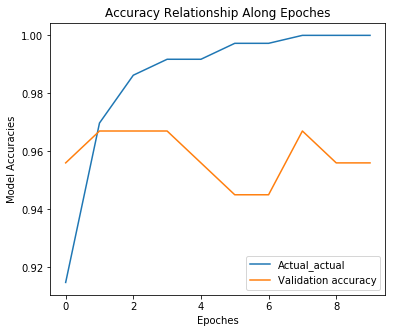

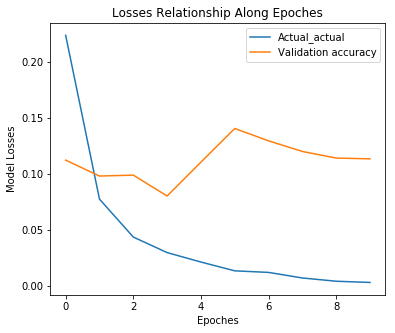

In [46]:
plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Model Accuracies')
plt.title('Accuracy Relationship Along Epoches')
plt.legend(['Actual_actual','Validation accuracy'])
plt.show()


plt.figure(figsize=(6,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoches')
plt.ylabel('Model Losses')
plt.title('Losses Relationship Along Epoches')
plt.legend(['Actual_actual','Validation accuracy'])
plt.show()

**From the above we can see the data avalible in the validation having less accuracy than the training data but but not the so much diffrence inbtween their accuracy.**

**If neccesary we can Tun the Neural network hyper-parameter as well.**

## Hyperparamter Tunning.

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [47]:
def set_model(learn_rate=0.001,momentum=0):
    model = Sequential()
    model.add(Dense(120,activation='relu',kernel_initializer='he_uniform',input_dim=input_dim))
    model.add(Dense(80,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(60,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))
    model.compile(optimizer=SGD(learn_rate, momentum=momentum),loss='binary_crossentropy',metrics=['accuracy'])
    
    return model 



seed = 7
np.random.seed(seed)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = KerasClassifier(build_fn=set_model, verbose=0)


learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=7,scoring='accuracy')
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967033 using {'momentum': 0.6, 'learn_rate': 0.1}
0.540659 (0.106406) with: {'momentum': 0.0, 'learn_rate': 0.001}
0.512088 (0.183092) with: {'momentum': 0.2, 'learn_rate': 0.001}
0.575824 (0.229647) with: {'momentum': 0.4, 'learn_rate': 0.001}
0.575824 (0.160274) with: {'momentum': 0.6, 'learn_rate': 0.001}
0.725275 (0.131170) with: {'momentum': 0.8, 'learn_rate': 0.001}
0.736264 (0.132962) with: {'momentum': 0.9, 'learn_rate': 0.001}
0.859341 (0.056633) with: {'momentum': 0.0, 'learn_rate': 0.01}
0.896703 (0.040046) with: {'momentum': 0.2, 'learn_rate': 0.01}
0.914286 (0.024474) with: {'momentum': 0.4, 'learn_rate': 0.01}
0.940659 (0.023874) with: {'momentum': 0.6, 'learn_rate': 0.01}
0.929670 (0.025818) with: {'momentum': 0.8, 'learn_rate': 0.01}
0.929670 (0.027096) with: {'momentum': 0.9, 'learn_rate': 0.01}
0.925275 (0.073749) with: {'momentum': 0.0, 'learn_rate': 0.1}
0.958242 (0.028146) with: {'momentum': 0.2, 'learn_rate': 0.1}
0.940659 (0.061773) with: {'momentum': 0.4

## AUC-ROC Curve

In [48]:
from sklearn.metrics import auc,roc_auc_score,roc_curve

In [49]:
 fpr, tpr, thresholds = roc_curve(y_test, y_predict)

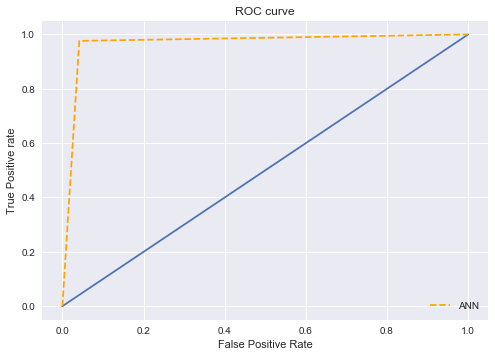

In [50]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves.
plt.plot([0, 1])
plt.plot(fpr, tpr, linestyle='--',color='orange', label='ANN')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### This is how we can see the area under the curve is high as compare to the outside that means our model good.

## Thank You !!